<a href="https://colab.research.google.com/github/christophermalone/stat360/blob/main/Handout14_Multicollinearity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Handout #14 : Multicollinearity

<table width='100%' ><tr><td bgcolor='green'></td></tr></table>

## MN Gay Marriage Amendment

Consider the following data collected on counties from all across Minnesota.  The goal here is to investigate the relationship between the outcome from the 2012 ballot measure to restrict marriage between a man and women in the State of MN and various demographics. <table>
  <tr>
    <td width='50%'>
      <ul>
        <li>Response Variable: Percent Voted Yes for Amendment #1</li><br>
        <li>Variables under investigation (i.e. independent variables)</li>
        <ul>
          <li>% Voted Democrat</li>
          <li>% Voted Republican</li>
          <li>Population Per Square Mile</li>
          <li>Per Capita Income</li>
          <li>Average Household Size</li>
          <li>% Bachelor or higher Education</li>
          <li>% Unemployment</li>
          <li>% Population Living in Poverty</li>
          <li>% of Population: Age 0-17</li>
          <li>% of Population: Age 18-24</li>
          <li>% of Population: Age 25-44</li>
          <li>% of Population: Age 45-64</li>
          <li>% of Population: Age 65 and Over</li>
          <li>% of Population: White</li>
          <li>% of Population: African American</li>
          <li>% of Population: American Indian</li>
          <li>% of Population: Asian</li>
          <li>% of Population: Other</li>
          <li>% of Population: Of Hispanic Origin</li>
         </ul>
     </ul>
    </td>
    <td width='50%'>
    <p align='center'><img src="https://drive.google.com/uc?export=view&id=1yat57mNueWJ95pux9YstUjp2JuTc7E9t" width="50%" height="50%"></img></p>
      
  </td>
</tr>
<tr>
    <td colspan='2' width='100%'>
    The following is the actual ballot.  A vote of Yes suggests only a union of a man and a women shall be recognized as a marriage in Minnesota.
     <p align='center'><img src="https://drive.google.com/uc?export=view&id=1QpvU-viFXzqRyiKdZXs-GhLa9OnFvBRb"></img></p>


  </td>
</tr>
</table>

Data Folder: [OneDrive](https://mnscu-my.sharepoint.com/:f:/g/personal/aq7839yd_minnstate_edu/EmOQfrwxzzRBqq8PH_8qTmMBy-1qKgM11Hb8vzjs025EEA?e=wyShYs)



<table width='100%' ><tr><td bgcolor='green'></td></tr></table>




## Reading in the Data

First, load the tidyverse package into this COLAB session. 

In [ ]:
#load tidyverse package
library(tidyverse)

Next, reading in the MN Marriage Amendment dataset.

In [2]:
# Reading data in using read_csv 
MN_Marriage_Amendment <- read_csv("http://www.StatsClass.org/stat360/Datasets/MN_Marriage_Amendment.csv")

Rows: 87 Columns: 23
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): State, County
dbl (21): FIPSCode, Pct_Yes, Pct_Democrat, Pct_Republican, PopPerSqMile, Per...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Taking a quick look at the data.

In [ ]:
head(MN_Marriage_Amendment)

## Multicollinearity - Simple Case

*    Model #1: % Yes ~ % Democrat + % Age 65 and Over
*    Model #2: % Yes ~ % Republican % Age 65 and Over
*    Model #3: % Yes ~ % Democrat + % Republican + % Age 65 and Over


Here, install the ppcor() package in order to obtain the partial correlations for the predictors used in these models.

In [ ]:
#install the ppcor() package
install.packages("ppcor")

In [ ]:
#load the ppcor() package
library(ppcor)

Model #1: $PctYes \sim PctDemocrat + PctAge65andOlder$

In [4]:
Model_Democrat_Age65 <- lm(Pct_Yes ~ Pct_Democrat + Pct_Age65andOlder, data=MN_Marriage_Amendment) 
summary(Model_Democrat_Age65)


Call:
lm(formula = Pct_Yes ~ Pct_Democrat + Pct_Age65andOlder, data = MN_Marriage_Amendment)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.027  -2.701  -0.142   2.881  14.680 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       77.17205    4.05593  19.027  < 2e-16 ***
Pct_Democrat      -0.79755    0.07247 -11.006  < 2e-16 ***
Pct_Age65andOlder  1.13363    0.11887   9.537 4.94e-15 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.695 on 84 degrees of freedom
Multiple R-squared:  0.7199,	Adjusted R-squared:  0.7132 
F-statistic: 107.9 on 2 and 84 DF,  p-value: < 2.2e-16


Consider the scatterplot matrix of the variables in this model.


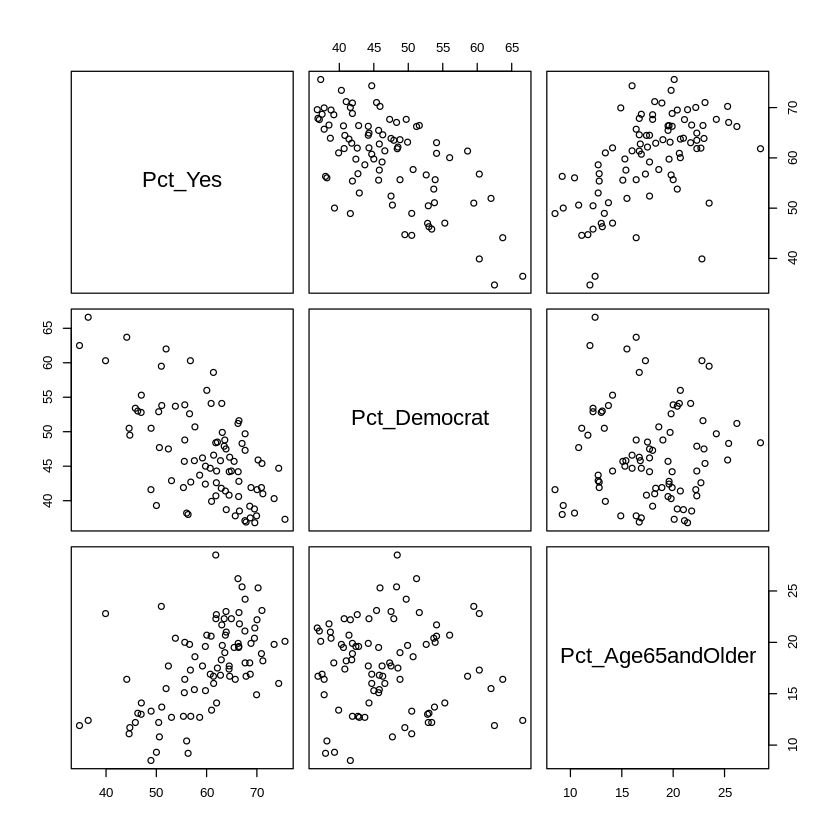

In [5]:
# From MN_Marriage_Amendment data.frame
# Column 4 = Pct_Yes, Column 5 = Pct_Democrat, and Column 17 = Pct_Age65andOlder
pairs(MN_Marriage_Amendment[,c(4,5,17)])

Lastly, consider the partial correlations for the predictors in Model #1. 

In [12]:
pcor(MN_Marriage_Amendment[,c(4,5,17)])$estimate

,Pct_Yes,Pct_Democrat,Pct_Age65andOlder
Pct_Yes,1.0000000,-0.7684406,0.7210072
Pct_Democrat,-0.7684406,1.0000000,0.5462101
Pct_Age65andOlder,0.7210072,0.5462101,1.0000000


Model #2: $PctYes \sim PctRepublican + PctAge65andOlder$

In [6]:
Model_Republican_Age65 <- lm(Pct_Yes ~ Pct_Republican + Pct_Age65andOlder, data=MN_Marriage_Amendment) 
summary(Model_Republican_Age65)


Call:
lm(formula = Pct_Yes ~ Pct_Republican + Pct_Age65andOlder, data = MN_Marriage_Amendment)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.5842  -2.5013  -0.3745   2.8525  14.1546 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -0.56829    4.20928  -0.135    0.893    
Pct_Republican     0.79185    0.07155  11.068  < 2e-16 ***
Pct_Age65andOlder  1.12956    0.11849   9.533 5.02e-15 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.68 on 84 degrees of freedom
Multiple R-squared:  0.7217,	Adjusted R-squared:  0.7151 
F-statistic: 108.9 on 2 and 84 DF,  p-value: < 2.2e-16


Consider the scatterplot matrix of the variables in this model.

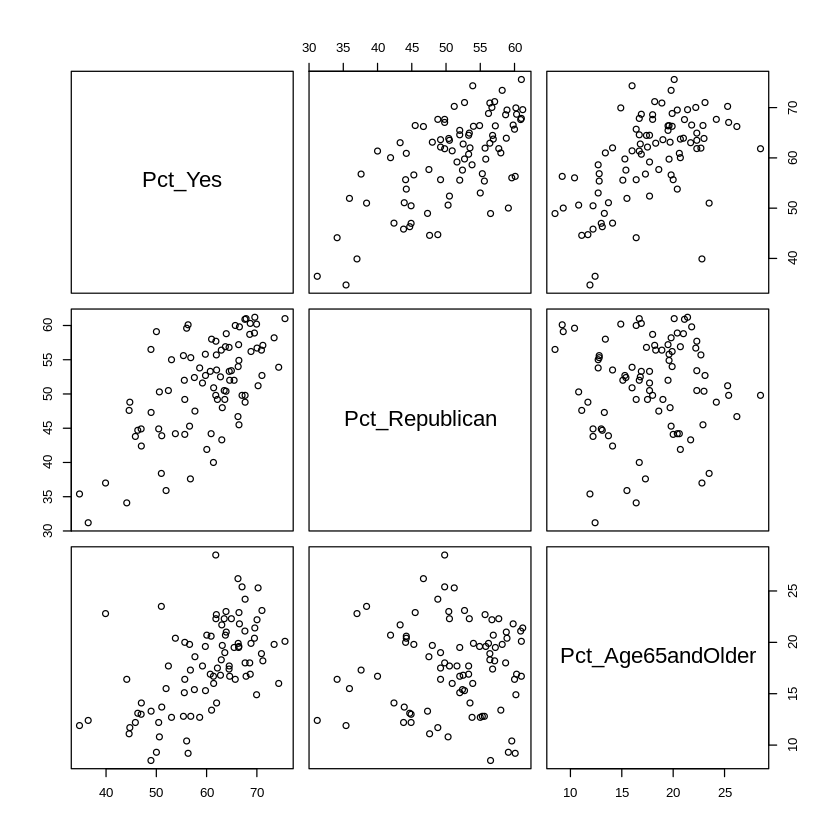

In [14]:
# From MN_Marriage_Amendment data.frame
# Column 4 = Pct_Yes, Column 6 = Pct_Republican, and Column 17 = Pct_Age65andOlder
pairs(MN_Marriage_Amendment[,c(4,6,17)])

Lastly, consider the partial correlations for the predictors in Model #2. 

In [15]:
pcor(MN_Marriage_Amendment[,c(4,6,17)])$estimate

,Pct_Yes,Pct_Republican,Pct_Age65andOlder
Pct_Yes,1.0000000,0.7701962,0.7208890
Pct_Republican,0.7701962,1.0000000,-0.5460575
Pct_Age65andOlder,0.7208890,-0.5460575,1.0000000


Model #3: $PctYes \sim PctDemocrat + PctRepublican + PctAge65andOlder$

In [8]:
Model_Democrat_Republican_Age65 <- lm(Pct_Yes ~ Pct_Democrat + Pct_Republican + Pct_Age65andOlder, data=MN_Marriage_Amendment) 
summary(Model_Democrat_Republican_Age65)


Call:
lm(formula = Pct_Yes ~ Pct_Democrat + Pct_Republican + Pct_Age65andOlder, 
    data = MN_Marriage_Amendment)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.3475  -2.3834  -0.2877   2.9756  13.8517 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -45.9434   154.1379  -0.298    0.766    
Pct_Democrat        0.4663     1.5834   0.294    0.769    
Pct_Republican      1.2533     1.5685   0.799    0.427    
Pct_Age65andOlder   1.1272     0.1194   9.441 8.56e-15 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.705 on 83 degrees of freedom
Multiple R-squared:  0.722,	Adjusted R-squared:  0.712 
F-statistic: 71.85 on 3 and 83 DF,  p-value: < 2.2e-16


Consider the scatterplot matrix of the variables in this model.

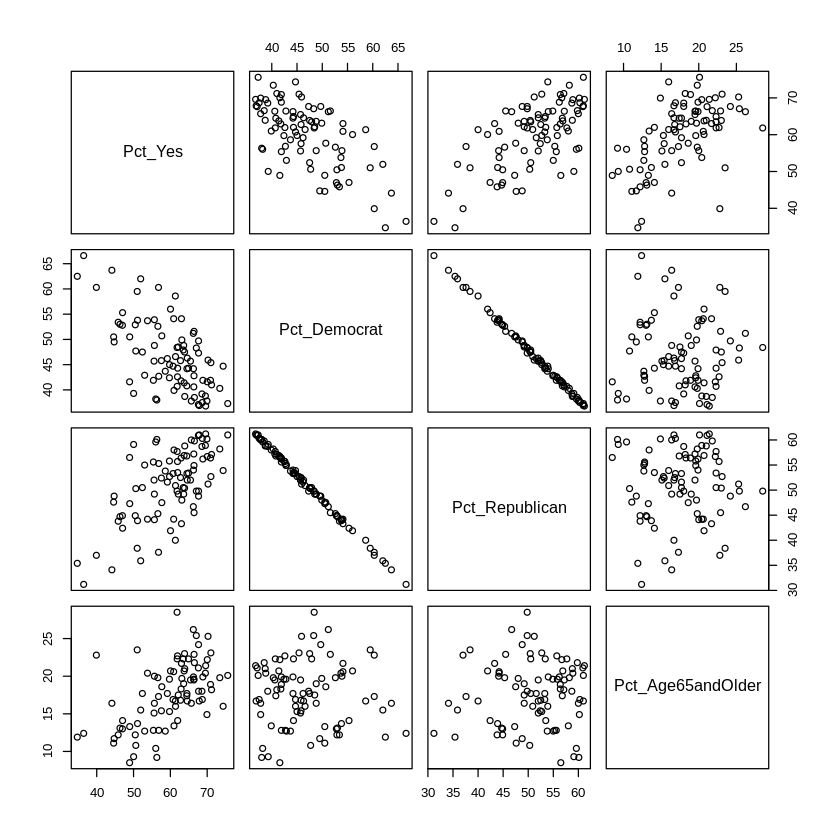

In [16]:
# From MN_Marriage_Amendment data.frame
# Column 4 = Pct_Yes, Column 5 = Pct_Democrat, Column 6 = Pct_Republican, and Column 17 = Pct_Age65andOlder
pairs(MN_Marriage_Amendment[,c(4,5,6,17)])

Lastly, consider the partial correlations for the predictors in Model #3. 

In [17]:
pcor(MN_Marriage_Amendment[,c(4,5,6,17)])$estimate

,Pct_Yes,Pct_Democrat,Pct_Republican,Pct_Age65andOlder
Pct_Yes,1.00000000,0.03230768,0.08736773,0.71959783
Pct_Democrat,0.03230768,1.00000000,-0.99743102,0.02261282
Pct_Republican,0.08736773,-0.99743102,1.00000000,-0.01655128
Pct_Age65andOlder,0.71959783,0.02261282,-0.01655128,1.00000000




---



---

## Install car() package 

The car package will be used to obtain the added variable plots for each model.

In [18]:
#install the car() package 
install.packages("car")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘Rcpp’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’




In [19]:
#load the car package into this COLAB session.
library(car)

Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some




## Variance Inflation Factor

The **variance inflaction factor** can be used to identify multicollinearity in a linear model.

$$ VIF_{i} = \frac{1}{1-R^{2}_{i}}$$

where $R^{2}_{i}$ is the r-squared from fitting predictor $i$ against all other predictors being considered.

The following are general guidelines for the use of VIF to identify multicollinearity. 
*   **Near 1**:  indicate the predictor variable is not correlated to others
*   **Between 1 and 5**: indicate the predictor variable is moderately correlated with one or more other predictor variables
*   **Greater than 5**: indicate the predictor variable is highly correlated to one or more other predictor variables

For example, to compute $VIF_{\% Democrat}$ , one must first obtain the $R^{2}$ from the model $PctDemocrat \sim PctRepublican + PctAge65andOlder$ , and then use this value to compute the variance inflation factor.

In [20]:
#Computing the Variance Inflation Factor for % Democrat
Model_PctDemocrat <- lm(Pct_Democrat ~ Pct_Republican + Pct_Age65andOlder, data=MN_Marriage_Amendment)
summary(Model_PctDemocrat)

cat("\nVariance Inflation Factor:")
cat("\n = 1 / (1 - 0.9979) = 476")


Call:
lm(formula = Pct_Democrat ~ Pct_Republican + Pct_Age65andOlder, 
    data = MN_Marriage_Amendment)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.86850 -0.19215  0.05095  0.22060  0.79136 

Coefficients:
                   Estimate Std. Error  t value Pr(>|t|)    
(Intercept)       97.307548   0.291637  333.660   <2e-16 ***
Pct_Republican    -0.989553   0.004957 -199.624   <2e-16 ***
Pct_Age65andOlder  0.004983   0.008209    0.607    0.546    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3242 on 84 degrees of freedom
Multiple R-squared:  0.9979,	Adjusted R-squared:  0.9978 
F-statistic: 1.993e+04 on 2 and 84 DF,  p-value: < 2.2e-16



Variance Inflation Factor:
 = 1 / (1 - 0.9979) = 476

## CAR package - Variance Inflation Factor

In [23]:
#Using vif() function from car package to compute the variance inflation factor 
# for the predictors in the model

as.data.frame( vif(Model_Democrat_Republican_Age65) )

,vif(Model_Democrat_Republican_Age65)
,<dbl>
Pct_Democrat,475.550957
Pct_Republican,475.606862
Pct_Age65andOlder,1.004818


## Considering all available predictors

Begin, by considering the correlation martrix of all available predictors.

In [ ]:
cor(MN_Marriage_Amendment[,-c(1,2,3)])

,Pct_Yes,Pct_Democrat,Pct_Republican,PopPerSqMile,PerCapitaIncome,AvgHousehold Size,Pct_Bachelororhigher,Pct_Unemployment,Pct_Poverty,Pct_Age0to17,Pct_Age18to24,Pct_Age25to44,Pct_Age45to64,Pct_Age65andOlder,Pct_RaceWhite,Pct_RaceAfricanAmerican,Pct_RaceAmericanIndian,Pct_RaceAsian,Pct_RaceOther,Pct_Hispanic
Pct_Yes,1.00000000,-0.64541723,0.64855039,-0.53041263,-0.58523594,-0.22417766,-0.80645228,-0.13263376,0.021101708,0.05515810,-0.4696915847,-0.51759911,0.197154870,0.56205416,0.35410407,-0.62448520,-0.0427026098,-0.49015819,0.06715177,0.033356164
Pct_Democrat,-0.64541723,1.00000000,-0.99894342,0.37191654,0.11144680,-0.22015197,0.33506309,0.06280675,0.325941638,-0.36309429,0.2898317955,-0.02059607,0.016021439,-0.01768341,-0.40693647,0.39436745,0.2340664416,0.25613803,0.05432809,0.081442613
Pct_Republican,0.64855039,-0.99894342,1.00000000,-0.36857228,-0.10841808,0.22121860,-0.33302413,-0.06055333,-0.320401128,0.36874121,-0.2960284709,0.01717944,-0.014030942,0.02074151,0.39367509,-0.39157020,-0.2237497669,-0.25029886,-0.04548360,-0.073722569
PopPerSqMile,-0.53041263,0.37191654,-0.36857228,1.00000000,0.47466412,0.15928657,0.55810156,0.08051932,0.071474101,0.09151799,0.1426364281,0.43221398,-0.186763792,-0.35790885,-0.47722039,0.87190275,-0.0636921085,0.80909140,0.15702456,0.156402530
PerCapitaIncome,-0.58523594,0.11144680,-0.10841808,0.47466412,1.00000000,0.27115894,0.79479494,-0.19078697,-0.576850914,0.20689757,-0.0796496181,0.53901582,0.014376326,-0.41245387,-0.08533944,0.53232438,-0.2703393380,0.52365535,0.02447708,0.024872262
AvgHousehold Size,-0.22417766,-0.22015197,0.22121860,0.15928657,0.27115894,1.00000000,0.31680898,0.10079381,-0.273606313,0.81791868,0.1871776871,0.74131029,-0.567426180,-0.81782806,-0.29735936,0.26925262,0.0623172436,0.33859399,0.21935603,0.243390772
Pct_Bachelororhigher,-0.80645228,0.33506309,-0.33302413,0.55810156,0.79479494,0.31680898,1.00000000,-0.10974819,-0.208758733,0.13361938,0.3738054888,0.55709983,-0.264881498,-0.58926856,-0.34647139,0.67307644,-0.0515096583,0.64673209,0.01824289,0.024232629
Pct_Unemployment,-0.13263376,0.06280675,-0.06055333,0.08051932,-0.19078697,0.10079381,-0.10974819,1.00000000,0.373032871,0.08185164,-0.1159618192,0.08094233,0.116076608,-0.05005931,-0.21768385,0.02054073,0.3071730600,-0.07896740,-0.13597407,-0.110579303
Pct_Poverty,0.02110171,0.32594164,-0.32040113,0.07147410,-0.57685091,-0.27360631,-0.20875873,0.37303287,1.000000000,-0.31396539,0.3133029818,-0.36748104,-0.060441452,0.20680364,-0.45287528,0.04911566,0.5444738928,-0.06806232,-0.01966482,-0.001461885
Pct_Age0to17,0.05515810,-0.36309429,0.36874121,0.09151799,0.20689757,0.81791868,0.13361938,0.08185164,-0.313965391,1.00000000,-0.1734116084,0.65387694,-0.481398857,-0.62662253,-0.29143896,0.12666305,0.1513794466,0.23314888,0.19417292,0.222426981


The following list of predictors will be retained after completing the appropriate correlation analysis.  A model that includes only these predictors is less likely to have multicollinearity concerns.

List of predictor variables to be used when building an inital model.

*   Pct_Republican
*   PerCaptiaIncome 
*   Pct_Bachelororhigher
*   Pct_Unemployment
*   Pct_Poverty
*   Pct_Age0to17
*   Pct_Age18to24
*   Pct_Age45to64
*   Pct_Age65andOlder
*   Pct_RaceWhite
*   Pct_RaceAfricanAmerican
*   Pct_RaceAmericanIndian
*   Pct_RaceOther


In [24]:
#Fitting an initial model with all available predictors
Model_Initial <- lm(Pct_Yes ~ Pct_Republican 
                              + PerCapitaIncome + Pct_Bachelororhigher 
                              + Pct_Unemployment + Pct_Poverty 
                              + Pct_Age0to17 + Pct_Age18to24 + Pct_Age45to64 + Pct_Age65andOlder
                              + Pct_RaceWhite + Pct_RaceAfricanAmerican + Pct_RaceAmericanIndian + Pct_RaceOther ,
                              data=MN_Marriage_Amendment
                   )
summary(Model_Initial)


Call:
lm(formula = Pct_Yes ~ Pct_Republican + PerCapitaIncome + Pct_Bachelororhigher + 
    Pct_Unemployment + Pct_Poverty + Pct_Age0to17 + Pct_Age18to24 + 
    Pct_Age45to64 + Pct_Age65andOlder + Pct_RaceWhite + Pct_RaceAfricanAmerican + 
    Pct_RaceAmericanIndian + Pct_RaceOther, data = MN_Marriage_Amendment)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.3185 -1.4731 -0.0521  1.4843  6.4936 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)             18.8512110 41.6679373   0.452  0.65231    
Pct_Republican           0.5268397  0.0520197  10.128 1.48e-15 ***
PerCapitaIncome         -0.0005900  0.0002270  -2.599  0.01129 *  
Pct_Bachelororhigher    -0.3185019  0.1030311  -3.091  0.00282 ** 
Pct_Unemployment        -1.6493002  0.3258654  -5.061 3.01e-06 ***
Pct_Poverty              0.1833830  0.1831922   1.001  0.32011    
Pct_Age0to17             1.1719541  0.4567580   2.566  0.01235 *  
Pct_Age18to24            0.0003671  0.33

Taking a look at the Added Variable Plots for the Initial model.


Added Variable Plots for Initial Model

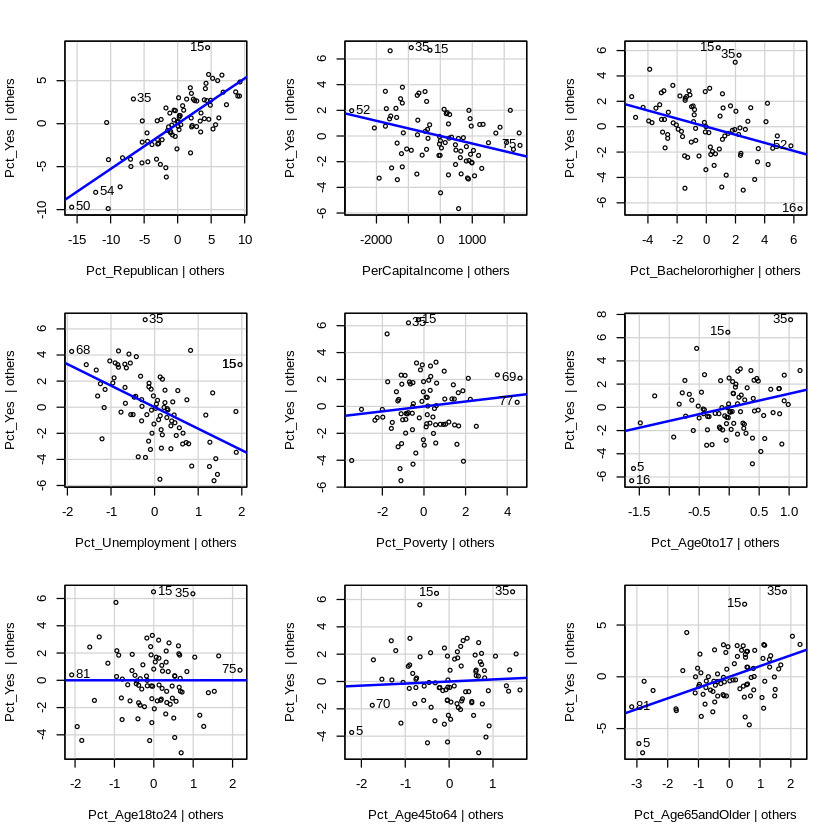

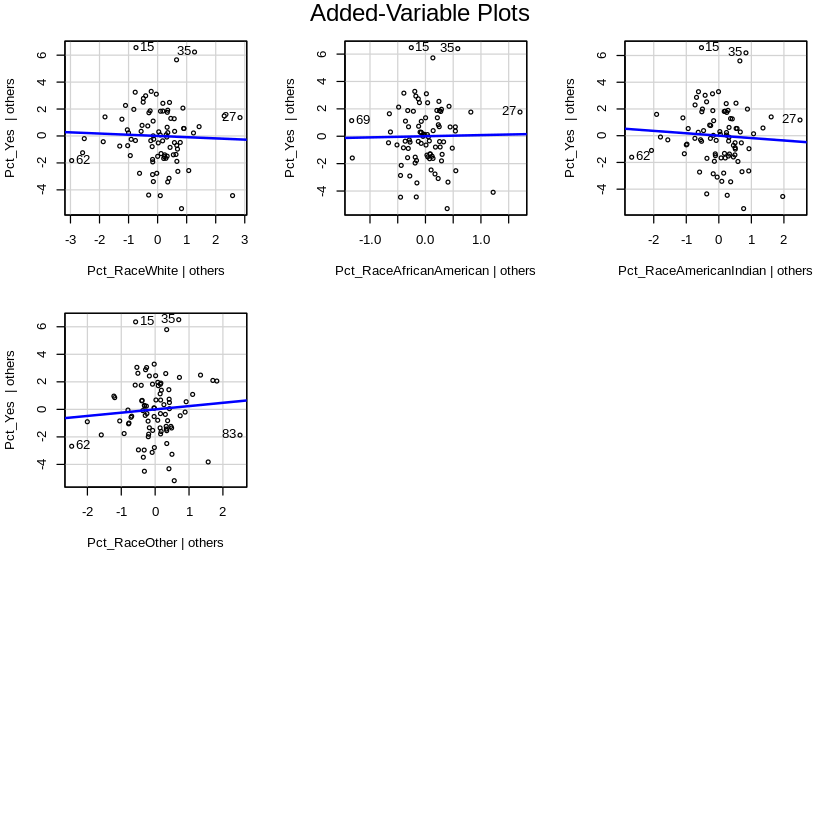

In [26]:
#Added Variable Plots for Model_Initial
cat("\nAdded Variable Plots for Initial Model")
avPlots(Model_Initial)

## Model with Statistically Significant Predictors Only

**Note**:  The importance of a predictor on the response can change each time a new predictor is added (or an existing predictor is deleted) from a model.  Removing an entire set of predictors at once is typically *not* advised.  Model selection is typically done by removing one predictor at a time.  More on this in a forthcoming handout.

In [27]:
#Model with only the predictors that are statistically significant
Model_ImportantPredictors  <- lm(Pct_Yes ~ Pct_Republican 
                                          + PerCapitaIncome + Pct_Bachelororhigher 
                                          + Pct_Unemployment 
                                          + Pct_Age0to17 + Pct_Age65andOlder, 
                                          data=MN_Marriage_Amendment
                   )
summary(Model_ImportantPredictors)


Call:
lm(formula = Pct_Yes ~ Pct_Republican + PerCapitaIncome + Pct_Bachelororhigher + 
    Pct_Unemployment + Pct_Age0to17 + Pct_Age65andOlder, data = MN_Marriage_Amendment)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.8516 -1.4814 -0.1775  1.2298  7.1905 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)          20.5293161  6.0239969   3.408 0.001027 ** 
Pct_Republican        0.4960096  0.0471489  10.520  < 2e-16 ***
PerCapitaIncome      -0.0005811  0.0001427  -4.072 0.000109 ***
Pct_Bachelororhigher -0.3141274  0.0831901  -3.776 0.000305 ***
Pct_Unemployment     -1.5786127  0.2789739  -5.659 2.29e-07 ***
Pct_Age0to17          1.0807781  0.1674609   6.454 7.78e-09 ***
Pct_Age65andOlder     1.0100931  0.1143705   8.832 1.88e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.519 on 80 degrees of freedom
Multiple R-squared:  0.9232,	Adjusted R-squared:  0.9174 
F-statistic: 160.2 on

Taking a look at the Added Variable Plots for the the updated model that includes only the important predictors.


Added Variable Plots for Model with Important Predictors



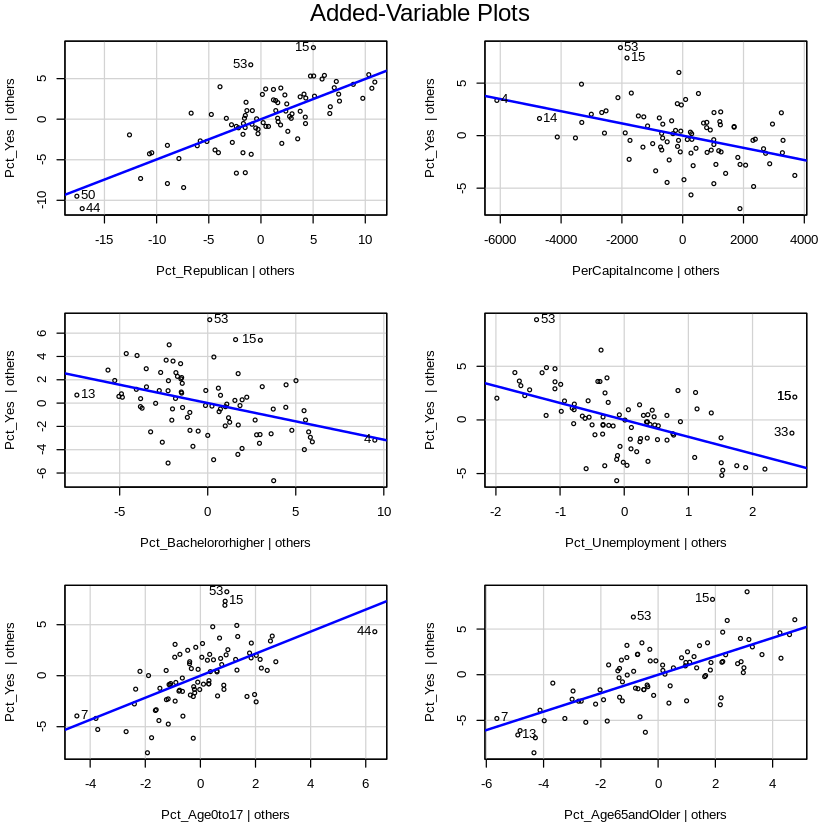

In [28]:
#AVP for Model_ImportantPredictors
cat("\nAdded Variable Plots for Model with Important Predictors\n\n")
avPlots(Model_ImportantPredictors)

## Checking VIF for both models

In [31]:
#VIF for Model_ImportantPredictors
cat("\nVIF for Initial Model \n\n")
data.frame(vif=vif(Model_Initial))

#VIF for Model_ImportantPredictors
cat("\nVIF for Model with Important Predictors\n\n")
data.frame(vif=vif(Model_ImportantPredictors))


VIF for Initial Model 



,vif
,<dbl>
Pct_Republican,1.973072
PerCapitaIncome,9.040251
Pct_Bachelororhigher,8.434801
Pct_Unemployment,1.593879
Pct_Poverty,4.994400
Pct_Age0to17,19.725105
Pct_Age18to24,20.077662
Pct_Age45to64,10.462672
Pct_Age65andOlder,14.241572



VIF for Model with Important Predictors



,vif
,<dbl>
Pct_Republican,1.498935
PerCapitaIncome,3.305343
Pct_Bachelororhigher,5.085257
Pct_Unemployment,1.080282
Pct_Age0to17,2.451913
Pct_Age65andOlder,3.215979




---



---
End of Document
